In [961]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [962]:
data = pd.read_csv('C:/Users/alonm/Desktop/projectFiles/diamonds.csv')

In [963]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [964]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [965]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [966]:
import seaborn as sns
import matplotlib.pyplot as plt

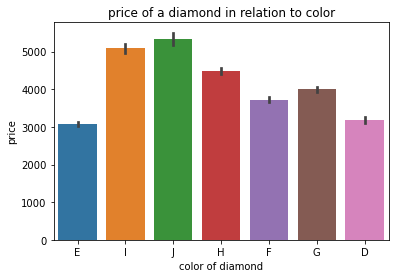

In [967]:
sns.barplot(x = 'color', y = 'price', data = data)
plt.ylabel('price')
plt.xlabel('color of diamond')
plt.title('price of a diamond in relation to color');

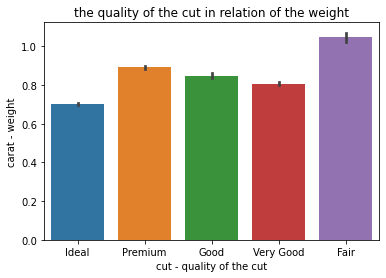

In [968]:
sns.barplot(x = 'cut', y = 'carat', data = data)
plt.ylabel('carat - weight')
plt.xlabel('cut - quality of the cut')
plt.title('the quality of the cut in relation of the weight');

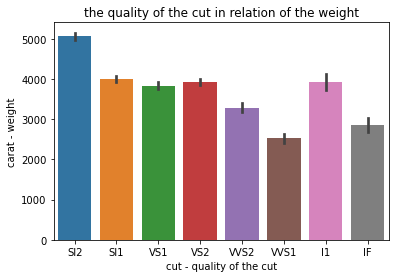

In [969]:
sns.barplot(x = 'clarity', y = 'price', data = data)
plt.ylabel('carat - weight')
plt.xlabel('cut - quality of the cut')
plt.title('the quality of the cut in relation of the weight');

In [970]:
data=data.drop(columns='Unnamed: 0')

In [971]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# the base of the linear regression

In [972]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [973]:
X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [974]:
dummy = DummyRegressor()
dummy.fit(X_train,y_train)
dummy.score(X_test, y_test)

-0.0001680354501172321

In [975]:
lin = LinearRegression()
lin.fit(X_train,y_train)
lin_pred = lin.predict(X_test)

In [976]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  713.3569106554892
MSE (RMSE)    :  1147824.9078867163  ( 1071.3659075622652 )
R2 score      :  0.9256165884590072


# Dealing with outliners

In [977]:
(data.y ==0).sum()

7

In [978]:
(data.z ==0).sum()

20

In [979]:
(data.x ==0).sum()

8

In [980]:
(data.table ==0).sum()

0

In [981]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [982]:
data.shape

(53920, 10)

In [983]:
import seaborn as sns
import matplotlib.pyplot as plt

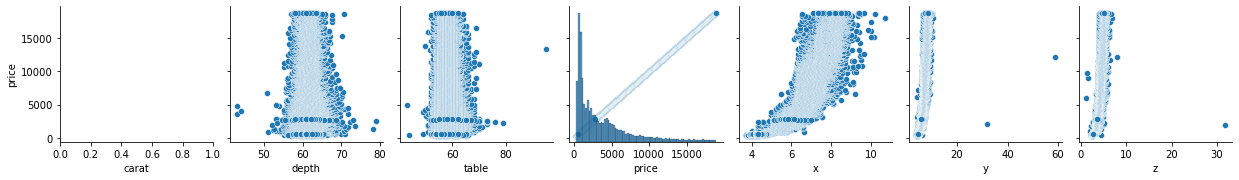

In [984]:
sns.pairplot(data, y_vars = 'price')

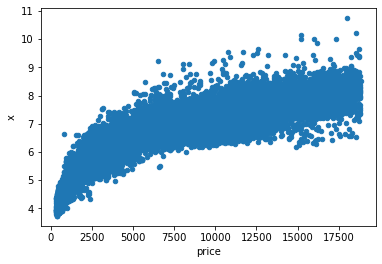

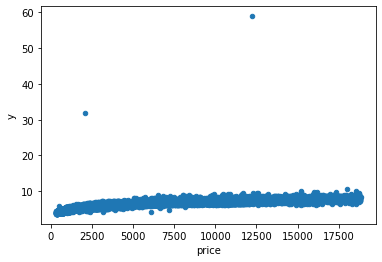

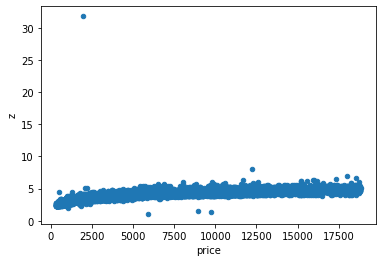

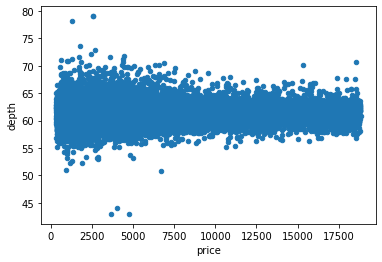

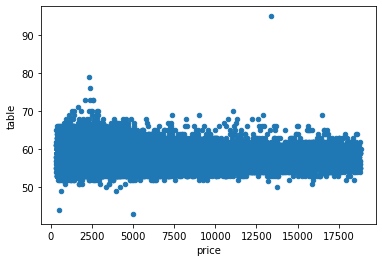

In [985]:
x_vars = ['x','y', 'z','depth','table']
for x_var in x_vars:
    data.plot(kind = 'scatter', x = 'price', y = x_var)

In [986]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [987]:
data = data[(data["table"]<70)&(data["table"]>45)]
data = data[(data["depth"]<70)&(data["depth"]>45)]
data = data[(data["z"]<30)&(data["z"]>2)]
data = data[(data["y"]<30)]
data = data[(data["x"]<9)]

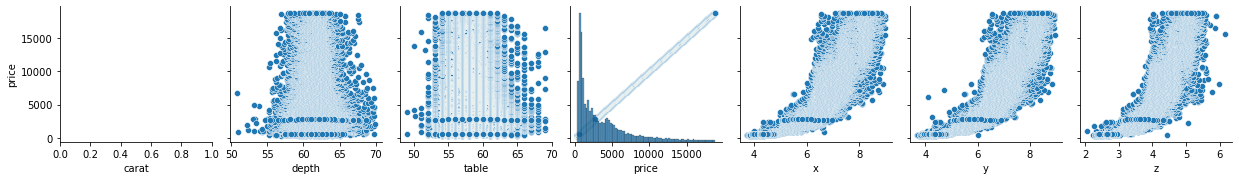

In [988]:
sns.pairplot(data, y_vars = 'price')

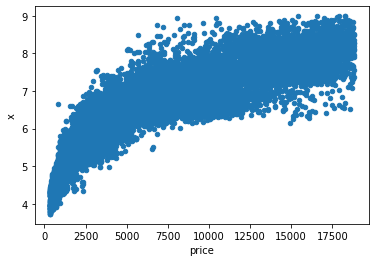

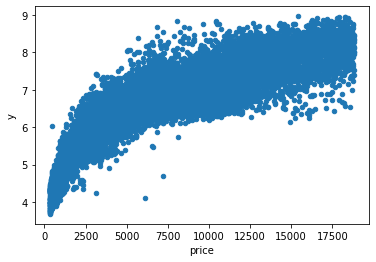

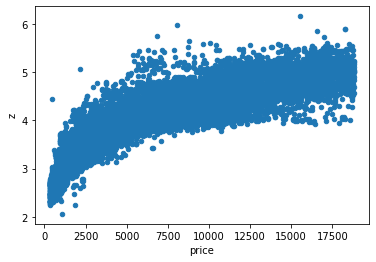

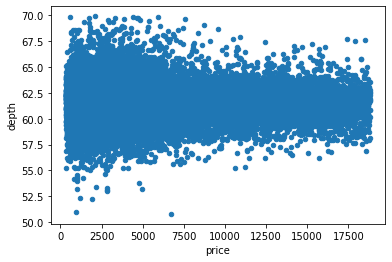

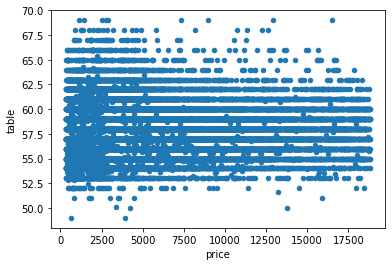

In [989]:
x_vars = ['x','y', 'z','depth','table']
for x_var in x_vars:
    data.plot(kind = 'scatter', x = 'price', y = x_var)

In [990]:
data.shape

(53828, 10)

In [991]:
df2 = data.copy()

In [992]:
df = pd.get_dummies(data)

In [993]:
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# using the module after dealing with outliners

In [994]:
X = df.drop(['price'], axis = 1)

In [995]:
y = df['price']

In [996]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [997]:
lin = LinearRegression()

In [998]:
lin.fit(X_train,y_train)

LinearRegression()

In [999]:
lin_pred = lin.predict(X_test)

In [1000]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1001]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  713.3569106554892
MSE (RMSE)    :  1147824.9078867163  ( 1071.3659075622652 )
R2 score      :  0.9256165884590072


# using scalers

In [1002]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1003]:
scaler = StandardScaler()

In [1004]:
X_s = scaler.fit_transform(X)

In [1005]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3, random_state=2)

In [1006]:
lin1 = LinearRegression()
lin1.fit(X_train,y_train)

LinearRegression()

In [1007]:
lin_pred = lin1.predict(X_test)

In [1008]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  713.4577679404108
MSE (RMSE)    :  1147849.1919158704  ( 1071.3772407120987 )
R2 score      :  0.925615014761728


In [1009]:
scaler = MinMaxScaler()

In [1010]:
X_m = scaler.fit_transform(X)

In [1011]:
X_train, X_test, y_train, y_test = train_test_split(X_m, y, test_size=0.3, random_state=2)

In [1012]:
lin2 = LinearRegression()
lin2.fit(X_train,y_train)

LinearRegression()

In [1013]:
lin_pred = lin2.predict(X_test)

In [1014]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  713.3569106553955
MSE (RMSE)    :  1147824.9078866916  ( 1071.3659075622538 )
R2 score      :  0.9256165884590087


In [1015]:
# it is shown thats scaler do not affect the estimates.

# Feature selection

In [1016]:
data = df2.copy()

In [1017]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [1018]:
#replace the cut category with numbers 1-5
new_cut = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(new_cut);

#replace the color category with numbers 1-7
new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color);

#replace the clarity category with numbers 1-8
new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity);

In [1019]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [1020]:
lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
lin.fit(X_test, y_test)
print(lin.intercept_)
list(zip(X.columns, lin.coef_))

-16425.183149407636


[('carat', 11834.093695303556),
 ('cut', 135.60845196508052),
 ('color', 328.16676180740177),
 ('clarity', 486.1524835913831),
 ('depth', 258.02110713867773),
 ('table', -27.218836470946002),
 ('x', -1013.762574264637),
 ('y', 3270.8018972268337),
 ('z', -5748.587883388289)]

# the regression equation

In [1021]:
# we'll see if table "belongs" in our model, meaning does it improve the quality of our predictions.
X_t = X.drop(['table'], axis = 1)
lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3, random_state=2)
lin.fit(X_test, y_test)
lin_pred = lin.predict(X_test)

In [1022]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  775.9066155288648
MSE (RMSE)    :  1320672.6884948835  ( 1149.2052421107744 )
R2 score      :  0.9144153960902199


In [1023]:
# table belongs in the model, because having it improve our predictions.
# we'll try depth next.

In [1024]:
X_d = X.drop(['depth'], axis = 1)
lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.3, random_state=2)
lin.fit(X_test, y_test)
lin_pred = lin.predict(X_test)

In [1025]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  777.4050302611568
MSE (RMSE)    :  1325265.2830256145  ( 1151.2016691377817 )
R2 score      :  0.914117778529673


In [1026]:
# depth belongs in the model, because having it improve our predictions.
# we'll try color next.

In [1031]:
X_c = X.drop(['color'], axis = 1)
lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.3, random_state=2)
lin.fit(X_test, y_test)
lin_pred = lin.predict(X_test)

In [1032]:
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)


#print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

MAE           :  777.4050302611568
MSE (RMSE)    :  1325265.2830256145  ( 1151.2016691377817 )
R2 score      :  0.914117778529673


In [1029]:
# it seems all the low influence feature are important to our predictions

# Heatmap

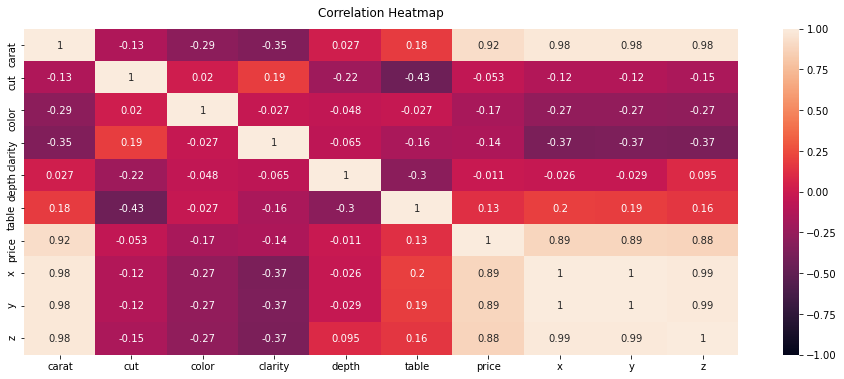

In [1030]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);